In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.interpolate import griddata
from sklearn.linear_model import LinearRegression

In [128]:
#Import Data
#USER INPUT REQUIRED
root = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\csvs'
y_val_csv = 'adas_values.csv'
x_val_csv = 'connectivity_to_prospective_limbic.csv'
z_val_csv = 'connectivity_to_prospective_ventral_attention.csv'
plane_csv = 'two_networks_overall_predictions.csv'

analysis_name = 'two_networks_tf'
out_dir = r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\linear_regression'

#RUNS WITHOUT INPUT
x_df = pd.read_csv(os.path.join(root, x_val_csv), usecols=[1])
z_df = pd.read_csv(os.path.join(root, z_val_csv), usecols=[1])
y_df = pd.read_csv(os.path.join(root, y_val_csv), usecols=[4])
# plane_df = pd.read_csv(os.path.join(root, plane_csv), usecols=[1])

all_data = pd.concat([y_df, x_df, z_df], axis=1)
colnames = all_data.columns
newnames = []
for name in colnames:
    arb = os.path.basename(name)
    newnames.append(arb)
all_data.columns = newnames
all_data.tail()

In [ ]:
#OPTIONAL -- Remove Outliers
#USER INPUT HERE
outlier_index = 47
#RUNS WITHOUT USER INPUT
all_data.drop([outlier_index], axis=0, inplace=True)

In [129]:
#Prepare the x and z planes
x_line = np.linspace(x_df.min(), x_df.max(), 100)
z_line = np.linspace(z_df.min(), z_df.max(), 100)
x_plane, z_plane = np.meshgrid(x_line, z_line)
prepped = pd.DataFrame({'x': x_plane.flatten(), 'z': z_plane.flatten()})
prepped.tail()

,x,z
9995,0.402343,-0.083609
9996,0.407323,-0.083609
9997,0.412304,-0.083609
9998,0.417284,-0.083609
9999,0.422265,-0.083609


In [130]:
# #OPTION A --Using OLS Method SKLEARN
# import statsmodels.formula.api as smf

# #SKLearn Regression
# ols = linear_model.LinearRegression()
# x_fit = pd.concat([x_df, z_df], axis=1)
# model = ols.fit(x_fit, y_df)
# x_fit.tail()

# #Create the Regression Plane with SK
# predicted = model.predict(prepped)

# r2 = model.score(x_fit, y_df)
# print('r2: ', r2)

In [131]:
#OPTION B -- Create Regression Plane Using TF Model
import tensorflow as tf
linear_model = tf.keras.models.load_model(r'C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\linear_regression\two_networks_linear_regression_2_networks_all_data_model')
predicted = linear_model.predict(prepped)

313/313 [==============================] - 0s 510us/step


Text(0.5, 0.98, 'r: 0.39, p: 0.0055')

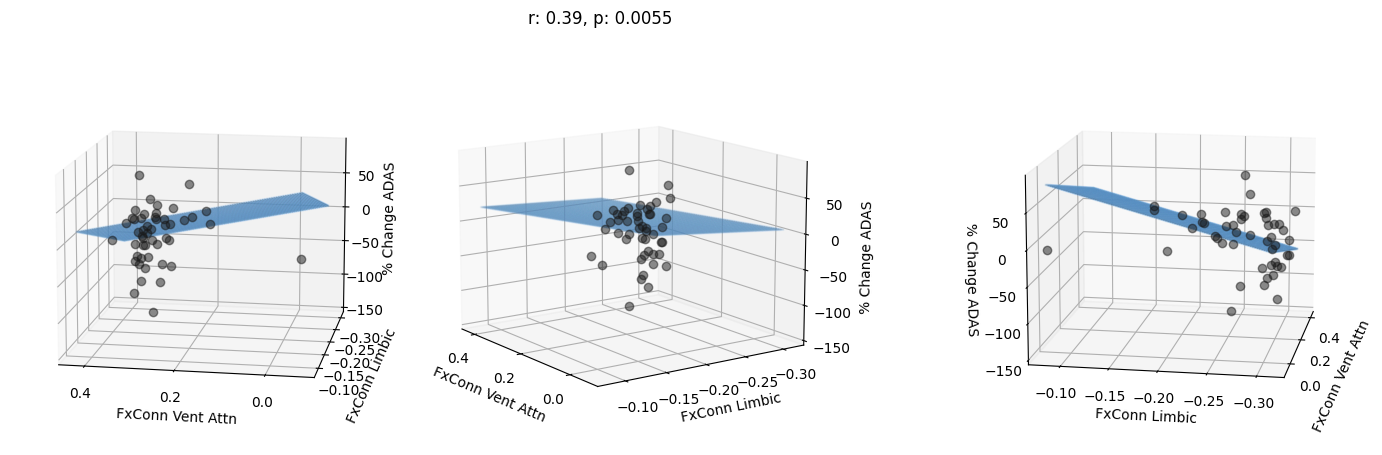

In [133]:
#Plot
plt.style.use('default')

#Setup
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121, projection = '3d')
ax1.view_init(elev=13, azim=100)
ax2 = fig.add_subplot(132, projection = '3d')
ax2.view_init(elev=13, azim=145)
ax3 = fig.add_subplot(133, projection = '3d')
ax3.view_init(elev=13, azim=190)

y = all_data[newnames[0]]
x = all_data[newnames[1]]
z = all_data[newnames[2]]

axes = [ax1, ax2, ax3]
for ax in axes:
    ax.plot(x,z,y, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(x_plane, z_plane, predicted, facecolor=(0,0,0,0), alpha=0.1, s=1, edgecolor='#70b3f0')
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')
    ax.set_xlabel('FxConn Vent Attn', fontsize='10')
    ax.set_ylabel('FxConn Limbic', fontsize='10')
    ax.set_zlabel('% Change ADAS', fontsize='10')
    # fig.tight_layout()

fig.suptitle(f'r: {.39}, p: {0.0055}', fontsize=12)
# fig.show()

In [134]:
figname = '3d_scatter_multi_regress_' + analysis_name + '.png'
save_path = os.path.join(out_dir, figname)
print(save_path)

#Save figure
if glob.glob(save_path) == []:
    fig.savefig(save_path)
else:
    figname = '3d_scatter_multi_regress_' + analysis_name + '(2).png'
    save_path = os.path.join(out_dir, figname)
    fig.savefig(save_path)

C:\Users\calvin.howard\Dropbox (Partners HealthCare)\memory\analyses\linear_regression\3d_scatter_multi_regress_two_networks_tf.png
